In [ ]:
import pandas as pd
import os
import sys
import numpy as np
from glob import glob

import cv2
import matplotlib.pyplot as plt

from tqdm import tqdm

In [62]:
challenge_names = ['AU_Detection_Challenge',
                   'EXPR_Classification_Challenge',
                   'MTL_Challenge',
                   'VA_Estimation_Challenge']

# challenge_cols = ['AU_Detection_Cha']
splits = ['Train_Set', 'Validation_Set']
PATH = '/mnt/DATA2/congvm/Affwild2/Annotations/'
# CROP_PATHS = '/mnt/DATA2/congvm/Affwild2/cropped_aligned/'
CROP_PATHS = '/mnt/DATA2/congvm/Affwild2/images/batch'

In [63]:
def read_txt(path):
    with open(path, 'r') as f:
        lines = f.readlines()
        lines = [line.strip().split(',') for line in lines]
        return lines

In [105]:
# Load Training
fails = {}
success = {}

challenge_names = ['MTL_Challenge']
for chname in challenge_names:
    if chname == 'AU_Detection_Challenge':
        # TODO: Not finised
        cols_names = ['VideoID', 'FrameID' ,'AU1', 'AU2', 'AU4', 'AU6', 'AU7', 'AU10', 'AU12', 'AU15', 'AU23', 'AU24', 'AU25', 'AU26']
        path_to_load = os.path.join(*[PATH, chname, 'Train_Set', '*.txt'])
        all_paths = glob(path_to_load)
        anno_data = []

        # For each video
        for path in tqdm(all_paths):
            lines = read_txt(path)

            # cols = lines[0]
            data = lines[1:]
            video_id = path.split('/')[-1].replace('.txt', '')

            all_frame_paths = glob(os.path.join(*[CROP_PATHS, video_id, '*.jpg']))
            all_frame_paths.sort(key=lambda x: int(x.split('/')[-1].split('.')[0]))
            all_frame_paths = [fpath.split('/')[-1] for fpath in all_frame_paths]
            video_ids = [video_id]*len(all_frame_paths)
        
            # print(video_id, all_frame_paths[0:10], path, len(all_frame_paths), len(data))
            
            try:
                assert len(data) == len(all_frame_paths)
            except:
                fails.setdefault(chname, []).append(path)
                continue
                
            success.setdefault(chname, []).append(path)
            for vid, fid, d in zip(video_ids, all_frame_paths, data):
                _d = [vid, fid]
                _d.extend(d)
                anno_data.append(_d)
        
        df = pd.DataFrame(anno_data, columns=cols_names)
        break

    elif chname == 'EXPR_Classification_Challenge':
        # TODO: Not finised
        cols_names = ['VideoID', 'FrameID', 'Neutral', 'Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise', 'Other']
        path_to_load = os.path.join(*[PATH, chname, 'Train_Set', '*.txt'])
        all_paths = glob(path_to_load)
        
    elif  chname == 'MTL_Challenge':
        print('> Convert MTL_Challenge to CSV file')
        path_to_load = os.path.join(*[PATH, chname, '*.txt'])
        cols_names = ['VideoID', 'FrameID', 'Valence', 'Arousal', 'Expression','AU1', 'AU2', 'AU4', 'AU6', 'AU7', 'AU10', 'AU12', 'AU15', 'AU23', 'AU24', 'AU25', 'AU26']
        all_paths = glob(path_to_load) # Train split
        assert len(all_paths) == 2
        for path in all_paths:
            split = path.split('/')[-1].split('_')[0]
            lines = read_txt(all_paths[0])
            # cols = lines[0]
            data = lines[1:]

            video_ids = [d[0].split('/')[0] for d in data]
            frame_ids = [d[0].split('/')[1] for d in data]

            assert len(video_ids) == len(data)
            anno_data = []
            for vid, fid, d in zip(video_ids, frame_ids, data):
                _d = [vid, fid]
                _d.extend(d[1:])
                anno_data.append(_d)
            df = pd.DataFrame(anno_data, columns=cols_names)
            df.to_csv(f'/mnt/DATA2/congvm/Affwild2/mtl_{split}_anno.csv', index=False)
    # break

> Convert MTL_Challenge to CSV file


In [107]:
# Check MTL File
df = pd.read_csv('/mnt/DATA2/congvm/Affwild2/mtl_train_anno.csv')
df


,VideoID,FrameID,Valence,Arousal,Expression,AU1,AU2,AU4,AU6,AU7,AU10,AU12,AU15,AU23,AU24,AU25,AU26
0,426,00001.jpg,0.0,0.054,0,0,0,0,0,0,1,0,0,0,0,0,0
1,426,00003.jpg,0.0,0.077,0,0,0,0,0,0,0,0,0,0,0,1,0
2,426,00007.jpg,0.0,0.117,0,0,0,0,0,0,0,0,0,0,0,1,0
3,426,00050.jpg,0.0,0.156,-1,0,0,0,0,0,0,0,0,0,0,1,0
4,426,00060.jpg,0.0,0.156,4,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145268,video48,02518.jpg,-5.0,-5.000,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
145269,video48,02522.jpg,-5.0,-5.000,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
145270,video48,02526.jpg,-5.0,-5.000,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
145271,video48,02530.jpg,-5.0,-5.000,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


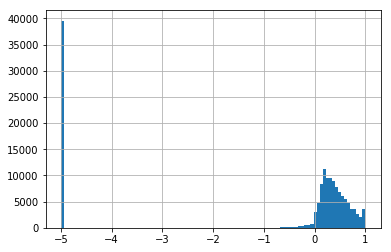

In [110]:
df.Arousal.hist(bins=100)

Image Shape:  (112, 112, 3)


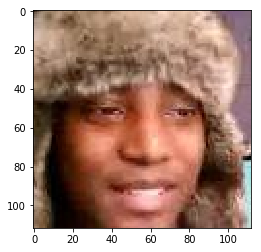

In [61]:
img_arr = cv2.imread('/mnt/DATA2/congvm/Affwild2/cropped_aligned/131/00344.jpg')[..., ::-1]
print('Image Shape: ', img_arr.shape)
plt.imshow(img_arr)

In [ ]:
# read_txt('/mnt/DATA2/congvm/Affwild2/Annotations/MTL_Challenge/train_set.txt')

In [81]:
for chname in ['MTL_Challenge',
                   'VA_Estimation_Challenge']:
    path_to_load = os.path.join(*[PATH, chname, '*.txt'])
    all_paths = glob(path_to_load)
    # break
    lines = read_txt(all_paths[0])
    break

    # data = np.array(data, dtype=np.int)
    # print(cols)

In [84]:
lines[0]

['image', 'valence', 'arousal', 'expression', 'aus']

In [90]:
cols = ['Image', 'Valence', 'Arousal', 'Expression','AU1', 'AU2', 'AU4', 'AU6', 'AU7', 'AU10', 'AU12', 'AU15', 'AU23', 'AU24', 'AU25', 'AU26']

In [91]:
np.array(lines[1:])

array([['426/00001.jpg', '0.0', '0.054', ..., '0', '0', '0'],
       ['426/00003.jpg', '0.0', '0.077', ..., '0', '1', '0'],
       ['426/00007.jpg', '0.0', '0.117', ..., '0', '1', '0'],
       ...,
       ['video48/02526.jpg', '-5', '-5', ..., '-1', '-1', '-1'],
       ['video48/02530.jpg', '-5', '-5', ..., '-1', '-1', '-1'],
       ['video48/02534.jpg', '-5', '-5', ..., '-1', '-1', '-1']],
      dtype='<U32')